# Titanic

### A.k.a The titanic failure in trying to improve @skanev and @lacho results

Днес ще explore-ваме данните от [Titanic competition](https://www.kaggle.com/c/titanic) в Kaggle. Целта ни е да повишим score-а на двамата лектори - Стефан Кънев и Лъчезар Божков (може би е само на Стефан, не съм сигурен) от `0.78947`. Преди това, импортите:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

и малко default settings

In [2]:
pd.options.display.max_rows = 30
sns.set()

Готови сме да започваме!

## 1. Data Exploration

Преди да можем да тренираме каквото и да е било първо трябва да заредим, разгледаме, разчистим, инженерстваме и енкоуднем данните. Това ще правим в първата част на този ноутбук. 

Като за начало данните са разделени на два сета: train и test. Train сета съдържа цялата информация, a тест сета не съдържа информация за това дали човека е оцелял или не. Идеята на тест сета е да събмитнем "предсказанията" си и да видим на кое място ще се наредим сред 9k+ хората който са качили решенията си в Kaggle.

### 1.1 Import

In [6]:
original_data = pd.read_csv('train.csv', index_col='PassengerId')
original_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Още на пръв поглед виждаме първия ни проблем. В колоната Cabin има твърде много N/A стойности. Нека видим точно колко:

In [12]:
original_data['Cabin'].isna().sum()

687

Това са доста повече от колкото очаквах. Не съм сигурен дали изобщо ще можем да използваме тази колона по какъвто и да е било начин. Но преди да правим каквото и нека видим description-a на данните:

In [13]:
original_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tова е информацията за числовите колони в dataframe-а. Виждаме, че най-вероятно ще ни се наложи да гадаем възрастта на част от пътниците. Всички останали числови колони изглеждат запълнени. Нека проверим и нечисловите:

In [35]:
non_numeric_columns = [column for column in original_data.columns.tolist() if not column in original_data.describe().columns.tolist()]
[(column, type(original_data[column].dropna().iloc[0]), len(original_data[column].replace('', np.nan).dropna())) for column in non_numeric_columns]

[('Name', str, 891),
 ('Sex', str, 891),
 ('Ticket', str, 891),
 ('Cabin', str, 204),
 ('Embarked', str, 889)]

Виждаме че нямаме информация и за това от къде са се качили двама от пътниците. За тях ще можем да направим нова стойност която ще отговаря за това че не знаем. Нека направим clone на оригиналната data.

In [38]:
data = original_data.copy()

Нека си направим baseline модел по-който да следим прогреса си. За него ще използваме само numeric колоните и ще попълним nan-овете на age с 0.

In [39]:
numeric_data = data[data.describe().columns]
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,NaN,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


In [41]:
numeric_data = numeric_data.fillna(0)
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,0.0,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


Между другото ми е интересно да видя възрастовото разпледеление на пътниците, затова:

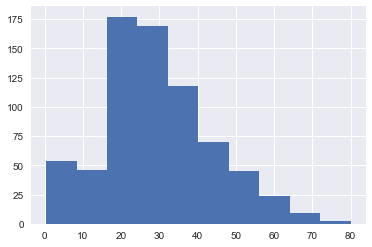

In [43]:
original_data['Age'].hist();

и след като занулихме:

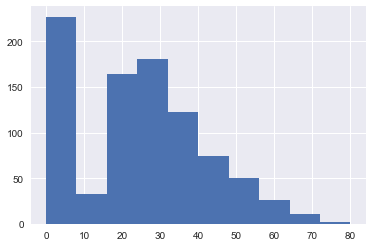

In [46]:
numeric_data['Age'].hist();

Back on track ...

### Baseline model

За baseline model-а ще използваме логистична регресия.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = numeric_data.drop(['Survived'], axis = 1)
y = numeric_data['Survived']

# Избираме random_state = 0 за да можем да сравняваме с резултатите получени от skanev
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
test_score  = regressor.score(X_test,  y_test)
print("Train score", train_score)
print("Test score", test_score)

Train score 0.709580838323
Test score 0.686098654709


Модела не отгатва твърде зле (по-добре е от cointoss, което общо взето автоматично го прави и по-добър от по-голямата част от гадателките), но много лесно можем да направим минимален improvement, като добавим малко по-добро "предсказване" за незнайните възрасти.

In [64]:
X['Age'] = original_data['Age'].fillna(original_data['Age'].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_mean_score = regressor.score(X_train, y_train)
test_with_mean_score  = regressor.score(X_test,  y_test)
print("Train score", train_with_mean_score)
print("Test score",  test_with_mean_score)
print("Diff train",  train_with_mean_score - train_score)
print("Diff test",   test_with_mean_score - test_score)

Train score 0.708083832335
Test score 0.695067264574
Diff train -0.00149700598802
Diff test 0.00896860986547


Така веднага видяхме микроскопично подобрение в трейн сет-а. За възрастта ще направим повече по-късно.

### Title
Когато погледнем имената можем да видим, че там се крият титлите на хората. По-голямата част от хората ще са просто Mr. или Mrs., но може би богаташите, на които са били дадени спасителни лодки, ще носят по-интересни титли.

In [80]:
regex = r".*,\s([A-Za-z]+\.)"
titles = data.Name.str.extract(regex)
titles.value_counts()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Mme.           1
Lady.          1
Don.           1
Sir.           1
Capt.          1
Jonkheer.      1
Ms.            1
Name: Name, dtype: int64

Тук имаме някои много интересни honorifics. За надало Mlle = Mademoiselle = Miss, Mme = Madame = Mrs. Lady, която най-вероятно ще сложим към Mrs. Don, Sir, Jonkheer са титли на благородници от мъжки пол, така че ще е добре да ги съберем на едно и също място, както Major. Col. и Capt. са военни. Тъй като воените може би са по склонни към самопожертвувание ще ги отделим от останалите мъжки титили. Всъщност можем да го проверим, но след като си напишем функция която да ни дава правилни титли.

In [86]:
import re

def title_conversion(name):
    srch = re.search(r".*,\s([A-Za-z]+\.)", name)
    if srch:
        title = srch.group(1)
        if title in ["Miss.", "Mlle."]:
            return "Miss."
        if title in ["Mrs.", "Mme.", "Lady.", "Ms."]:
            return "Mrs."
        if title in ["Mr.", "Dr.", "Rev."]:
            return "Mr."
        # С малко 
        if title in ["Don.", "Sir.", "Jonkheer.", "Dona."]:
            return "Don."
        if title in ["Major.", "Col.", "Capt."]:
            return "Major."
        return title
    
titles = [title_conversion(name) for name in data['Name']]
pd.Series(titles).value_counts()

Mr.        530
Miss.      184
Mrs.       128
Master.     40
Major.       5
Don.         3
dtype: int64

Така намалихме броя на title-ите, без да се отказваме от смисъла зад тях.

Нека бъдем fancy и си направим трансформатор използващ функцията по-горе.

In [115]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class AddTitleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        None
    def transform(self, X):
        for index, row in X.iterrows():
            X.loc[index, 'Title'] = title_conversion(row['Name'])
        return X

AddTitleTransformer().transform(data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.


In [117]:
data['Title'].value_counts()

Mr.        530
Miss.      184
Mrs.       128
Master.     40
Major.       5
Don.         3
Name: Title, dtype: int64

Нека се опитаме да разгледаме `Cabin`.

In [142]:
data['Cabin'].dropna()

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
22             D56
24              A6
28     C23 C25 C27
32             B78
53             D33
55             B30
56             C52
62             B28
63             C83
67             F33
          ...     
821            B69
824           E121
830            B28
836            E49
840            C47
850            C92
854            D28
858            E17
863            D17
868            A24
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

Веднага забелязваме че кабините са във формата `[[:alpha:]][[:digit:]]+`. `[[:alpha:]]` може би са етажите на кораба, което вероятно ще ни даде още един показател за прослойката. Също така може да е имало етажи който са били с повече смъртни случаи на базата на това че не са имали как да излязат на палубата. Проблем е че има някои които са с по няколко entry-та, но можем да проверим дали те винаги имат една и съща първа буква и ако е така да вземем нея.

In [153]:
data['Cabin'][data['Cabin'].str.match(r".*\s.*").fillna(False)]

PassengerId
28         C23 C25 C27
76               F G73
89         C23 C25 C27
98             D10 D12
119            B58 B60
129              F E69
298            C22 C26
300            B58 B60
306            C22 C26
312    B57 B59 B63 B66
342        C23 C25 C27
391            B96 B98
436            B96 B98
439        C23 C25 C27
499            C22 C26
680        B51 B53 B55
700              F G63
701            C62 C64
716              F G73
743    B57 B59 B63 B66
764            B96 B98
790            B82 B84
803            B96 B98
873        B51 B53 B55
Name: Cabin, dtype: object

Виждаме че има някои който имат по две кабини. След малък research в wikipedia, разбрах че deck-овете са наредени по престиж в намаляващ ред, така че когато имаме няколко, ще предпочитаме най-престижния. За N/A стойности ще използваме 'Z'

In [255]:
def fit_transform_cabin_to_deck(X):
    cabins = X['Cabin'].fillna('Z').map(lambda cabin: min(cabin.split(' ')))
    for index, row in X.iterrows():
        regexp_result = re.search(r"([A-Z]).*", cabins[index])
        if regexp_result:
            X.loc[index, 'Deck'] = regexp_result.group(1)
        else:
            X.loc[index, 'Deck'] = X.loc[index, 'Cabin']
    return X.drop(['Cabin'], axis=1)
data = fit_transform_cabin_to_deck(data)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,Z
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,Z
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.,Z
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master.,Z
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.,Z


Нека разгледаме хистограмата на deck-овете

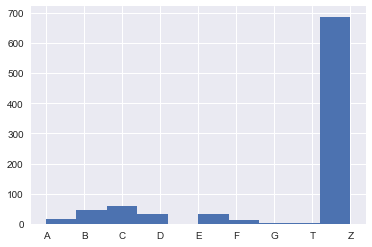

In [256]:
data['Deck'].hist();

In [257]:
data['Deck'].value_counts()

Z    687
C     59
B     47
E     33
D     33
A     15
F     12
G      4
T      1
Name: Deck, dtype: int64

#TODO: Delete the CabinDropper

In [140]:
class CabinDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X=None, y=None):
        None
    def transform(self, X):
        return X.drop(['Cabin'], axis=1)

### Parent-child & sibling-spouse

Нека направим две колони свързани с общия брой на роднините на кораба. Едната ще е сумата на двете съществуващи колони, а другата ще е сумата на двете съществуващи колони умножена по коефициент (-1 за мъже , 1 за жени), репрезентираща за колко човека трябва да се грижиш/ се грижат за теб. Запознат съм с факта, че това може да прозвучи доста сексистко, но данните ще покажат.

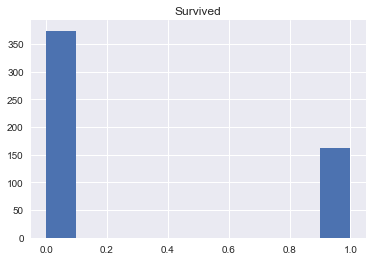

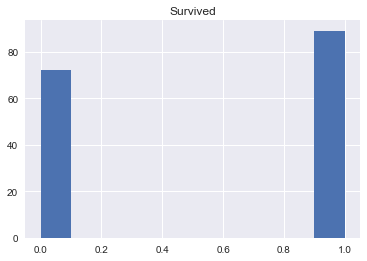

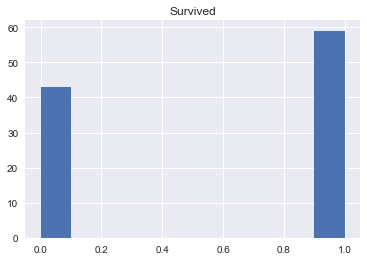

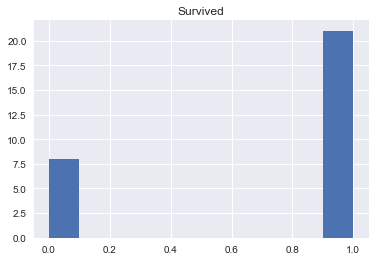

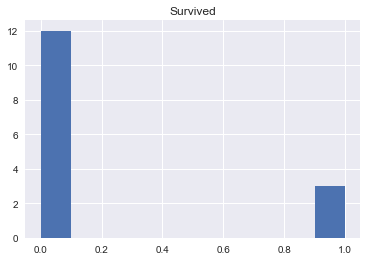

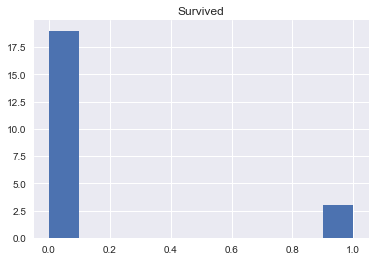

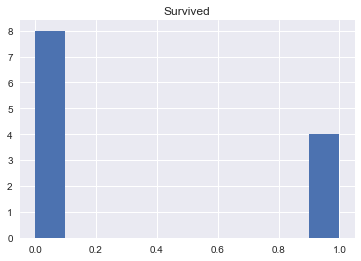

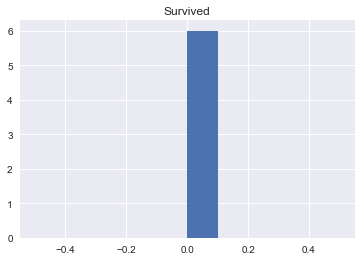

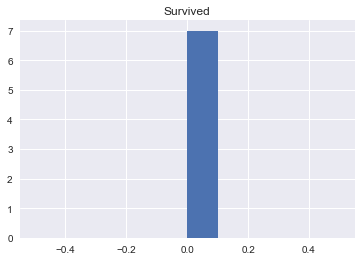

In [281]:
data['Family'] = data['SibSp'] + data['Parch']
data['Caretaking'] = (data['Sex'] == 'female').replace(False, -1) * data['Family']
data.groupby(['Family']).hist('Survived');

От хистограмите виждаме, че хората който са пътували с още 1, 2 или 3 члена на семейството са имали по-голям шанс да оцелеят. По-големите семейства може да бъдат смятани за outlier-и тъй като нямаме достатъчно данни. Нека да видим как изглеждат данните ни до момента.

In [282]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,Z,1,-1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,C,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,Z,0,-0.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.,Z,0,-0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.,E,0,-0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master.,Z,4,-4.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.,Z,2,2.0


Нека пробваме да вземем новите добавени numeric данни и да видим дали ще допринесат за повишаването на score-a.

In [288]:
numeric_columns = data.describe().columns
X = data[numeric_columns]
X['Age'] = original_data['Age'].fillna(original_data['Age'].mean())
X = X.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_family_score = regressor.score(X_train, y_train)
test_with_family_score  = regressor.score(X_test,  y_test)

print("Train score", train_with_family_score)
print("Test score",  test_with_family_score)
print("Diff train",  train_with_family_score - train_with_mean_score)
print("Diff test",   test_with_family_score - test_with_mean_score)

Train score 0.706586826347
Test score 0.708520179372
Diff train -0.00149700598802
Diff test 0.0134529147982


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Виждаме нарастване, което винаги е добър знак. Но казахме, че ще се опитаме да направим нещо по-специално за възрастта.

### Age

Нека се опитаме да предсказваме възрастта на пътниците за които нямаме информация. За момента ще използваме само numeric данните. Ако имаме improvement, ще го направим отново когато encode-нем всички данни.

In [300]:
from sklearn.linear_model import LinearRegression
X = data[numeric_columns]
X_with_age = X[X['Age'].notnull()]
X_without_age = X_with_age.drop(['Age'], axis=1)

y_age = X_with_age['Age']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_without_age, y_age)

model = LinearRegression()
model.fit(X_train_age, y_train_age)
age_train_score = model.score(X_train_age, y_train_age)
age_test_score  = model.score(X_test_age, y_test_age)

print('Train score', age_train_score)
print('Test score',  age_test_score)


Train score 0.292647768659
Test score 0.187363375123


Gosh, това беше доста по-зле от колкото очаквах и имаме сериозен overfit. Нека пробваме с Ridge.

In [302]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = {'alpha': [10**i for i in range(-2,3)]}

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_train_age, y_train_age)
pd.DataFrame(search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004361,0.001128,0.248964,0.297749,0.01,{'alpha': 0.01},4,0.238097,0.309251,0.187858,0.324810,0.320997,0.259185,0.000578,0.000074,0.054847,0.027999
1,0.003682,0.001519,0.248990,0.297748,0.1,{'alpha': 0.1},3,0.238079,0.309251,0.187982,0.324810,0.320970,0.259184,0.000479,0.000151,0.054791,0.027999
2,0.003310,0.001098,0.249228,0.297727,1,{'alpha': 1},2,0.237890,0.309232,0.189174,0.324787,0.320685,0.259162,0.000329,0.000291,0.054238,0.027999
3,0.002894,0.000798,0.249749,0.296023,10,{'alpha': 10},1,0.235250,0.307705,0.197483,0.322959,0.316596,0.257406,0.000639,0.000039,0.049658,0.028008
4,0.002739,0.001180,0.217943,0.255025,100,{'alpha': 100},5,0.200361,0.267824,0.186807,0.279418,0.266761,0.217834,0.000616,0.000417,0.034913,0.026721


Така е много по-приемливо. Изглежда че alpha около 10 върши чудеса. Нека поровим за малко по-добра стойност.

In [305]:
grid = {'alpha': [5, 7.5, 10, 12.5, 15, 20, 50]}

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_train_age, y_train_age)
estimator = search.best_estimator_
pd.DataFrame(search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003172,0.000943,0.249827,0.297260,5,{'alpha': 5},2,0.236861,0.308817,0.193593,0.324286,0.319100,0.258677,0.000305,0.000066,0.052009,0.028004
1,0.002620,0.000924,0.249885,0.296717,7.5,{'alpha': 7.5},1,0.236092,0.308330,0.195734,0.323703,0.317906,0.258117,0.000014,0.000109,0.050780,0.028006
2,0.002622,0.000830,0.249749,0.296023,10,{'alpha': 10},3,0.235250,0.307705,0.197483,0.322959,0.316596,0.257406,0.000219,0.000045,0.049658,0.028008
3,0.002356,0.000756,0.249452,0.295207,12.5,{'alpha': 12.5},4,0.234349,0.306965,0.198895,0.322082,0.315198,0.256574,0.000105,0.000054,0.048630,0.028006
4,0.002830,0.000979,0.249023,0.294291,15,{'alpha': 15},5,0.233404,0.306130,0.200018,0.321099,0.313734,0.255644,0.000659,0.000140,0.047685,0.028002
5,0.002270,0.000737,0.247850,0.292234,20,{'alpha': 20},6,0.231415,0.304240,0.201552,0.318891,0.310674,0.253572,0.000071,0.000036,0.046007,0.027985
6,0.002405,0.000725,0.236958,0.277598,50,{'alpha': 50},7,0.218832,0.290343,0.200128,0.303242,0.292015,0.239211,0.000503,0.000034,0.039621,0.027650


Изглежда че 7.5 е нашия победител. Преди да пуснем predict-а нека видим до колко беше точен prediction-а който използвахме до момента.

In [304]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_age, y_train_age)
dummy_age_train_score = dummy.score(X_train_age, y_train_age)
dummy_age_test_score = dummy.score(X_test_age, y_test_age)

print(dummy_age_train_score, dummy_age_test_score)

0.0 -0.00446270451706


Не е като да очаквахме друго, но е доста приятно да видим разликата. Нека също така видим какво получаваме и разликата с познатите ни данни.

In [320]:
pd.DataFrame([X_with_age['Age'].reindex(), estimator.predict(X_without_age)])[list(range(1,6))]

PassengerId,1,2,3,4,5
Age,22.000000,38.00000,26.000000,35.000000,35.000000
Unnamed 0,33.415589,21.95053,33.682841,29.267174,44.967868


Нека направим ново копие на оригиналните данни в което да имаме новите възрасти.

In [338]:
X_to_predict_age = X[X['Age'].isnull()]
predicted_age = estimator.predict(X_to_predict_age.drop(['Age'], axis=1)) 
data2 = data.copy()
data2.loc[data2['Age'].isna(), 'Age'] = predicted_age
pd.DataFrame([data_copy['Age'], data['Age']])

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Age,22.0,38.0,26.0,35.0,35.0,29.261173,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,24.937199,26.0,32.0
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0


In [339]:
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr.,Z,1,-1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs.,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs.,C,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr.,Z,0,-0.0
6,0,3,"Moran, Mr. James",male,29.261173,0,0,330877,8.4583,Q,Mr.,Z,0,-0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr.,E,0,-0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master.,Z,4,-4.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs.,Z,2,2.0


Нека отново видим дали сме повишили score-a на numeric колоните.

In [341]:
numeric_columns = data2.describe().columns
X = data2[numeric_columns]
X = X.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_age_score = regressor.score(X_train, y_train)
test_with_age_score  = regressor.score(X_test,  y_test)

print("Train score", train_with_age_score)
print("Test score",  test_with_age_score)
print("Diff train",  train_with_age_score - train_with_family_score)
print("Diff test",   test_with_age_score - test_with_family_score)

Train score 0.709580838323
Test score 0.704035874439
Diff train 0.00299401197605
Diff test -0.00448430493274


**Имаме нова дефиниция за anticlimactic ...**

## Encode-ване на данните

Ще трябва да encode-нем данните който все още не са numeric. Нека първо ги видим:

In [343]:
non_numeric_columns = [column for column in data2.columns if not column in data2.describe().columns]
data2[non_numeric_columns].loc[list(range(1, 11))]

,Name,Sex,Ticket,Embarked,Title,Deck
PassengerId,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S,Mr.,Z
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,Mrs.,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,Miss.,Z
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,Mrs.,C
5,"Allen, Mr. William Henry",male,373450,S,Mr.,Z
6,"Moran, Mr. James",male,330877,Q,Mr.,Z
7,"McCarthy, Mr. Timothy J",male,17463,S,Mr.,E
8,"Palsson, Master. Gosta Leonard",male,349909,S,Master.,Z
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,Mrs.,Z


План за действие:
1. Дропваме имена и номера на билети
2. OneHotEncode-ваме пол, отплаване и титла - Те са колони които нямат подредба
3. LabelEncode-ваме deck, тъй като има някаква подредба на дековете. Ако LabelEncoder не ни дава желаните резултати, го правим на ръка.

In [353]:
class DropTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        return self
    def transform(self, X):
        return X.drop(['Name', 'Ticket'], axis=1)
    
DropTransformer().transform(data2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,Mr.,Z,1,-1.0
2,1,1,female,38.000000,1,0,71.2833,C,Mrs.,C,1,1.0
3,1,3,female,26.000000,0,0,7.9250,S,Miss.,Z,0,0.0
4,1,1,female,35.000000,1,0,53.1000,S,Mrs.,C,1,1.0
5,0,3,male,35.000000,0,0,8.0500,S,Mr.,Z,0,-0.0
6,0,3,male,29.261173,0,0,8.4583,Q,Mr.,Z,0,-0.0
7,0,1,male,54.000000,0,0,51.8625,S,Mr.,E,0,-0.0
8,0,3,male,2.000000,3,1,21.0750,S,Master.,Z,4,-4.0
9,1,3,female,27.000000,0,2,11.1333,S,Mrs.,Z,2,2.0


In [372]:
from sklearn.preprocessing import OneHotEncoder
class SexTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        result = encoder.fit_transform(X['Sex'].apply(len).reshape(-1, 1).toarray())
        print(result)
        
SexTransformer().transform(data2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

## Поуки (до момента)

1. (Най-важно). Не sink-вай няколко часа работа в подобряване на feature, който е незначим за текущия модел. Опитвай се да намираш feature importance навреме.